#  FloraVision: Intelligent Flower Recognition

## Russie Shishmanov 4MI0800060

## Rangel Plachkov 1MI0800061

# Introduction to FloraVision: Intelligent Flower Recognition

Welcome to **FloraVision: Intelligent Flower Recognition**, an innovative project designed to harness the power of machine learning to identify a variety of flowers with OK accuracy. Built with cutting-edge technology, this project leverages TensorFlow and Python to create robust neural network models capable of distinguishing between different flower species. Our goal is not only to achieve a high level of recognition accuracy but also to **surpass a 66%** recognition threshold, the pioneers Russie Shishmanov and Rangel Plachkov aim to set a new standard in the field of botanical image classification.

FloraVision is more than just a technological endeavor; it represents a fusion of nature and advanced machine learning, bringing the beauty of flowers into the realm of digital intelligence. Utilizing TensorFlow, a leading open-source machine learning framework, and Python, a versatile and powerful programming language, we have developed two distinct neural network models. These models are trained to recognize and classify flowers with a high degree of precision, making FloraVision a pioneering project in floral recognition.

In an exciting and educational twist, FloraVision is designed to be used by children in a playful and interactive manner. Young users can engage with the system to recognize flowers, compete against the machine learning models, and earn points for outperforming the algorithms. This gamified approach not only makes learning fun but also encourages children to explore the fascinating world of flowers while developing an appreciation for technology and machine learning.

At the heart of FloraVision lies a commitment to excellence and innovation. Our neural network models are meticulously crafted and fine-tuned to deliver superior performance. By pushing the boundaries of what is possible in floral recognition, we aspire to create a tool that is both scientifically valuable and immensely enjoyable for users of all ages.

In conclusion, FloraVision: Intelligent Flower Recognition is a testament to the incredible potential of combining nature with technology. Through the use of TensorFlow and Python, we have developed a system that not only recognizes flowers with high accuracy but also engages and educates children in a delightful and competitive manner. Join us on this journey as we bring the beauty of flowers into the digital age and inspire the botanists and machine learning pioneers of tomorrow.


## The First Idea

The first idea is to develop an image classifier specifically designed for plant identification, classification of plant species. This classifier would utilize machine learning algorithms trained on a dataset of labeled plant images to accurately identify various plant species.

# Create a Dataset 

This code block effectively organizes the flower image dataset into subsets suitable for model training, testing, and validation. It ensures that each subset contains a representative distribution of images from each flower category, facilitating fair and robust model training and evaluation.

In [7]:
#all of the imports needed for the project 
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage as ski
from skimage import transform
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from tensorflow.keras import layers, models
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
os.environ['KMP_DUPLICATE_LIB_OK']='True'



In [61]:


# Define the source and destination directories
source_dir = {
    'Accacia_flower': "/home/ri9/Documents/FMI/Tensor/RawData/Accacia_flower",
    'Cypripedium_calceolus': "/home/ri9/Documents/FMI/Tensor/RawData/Cypripedium_calceolus",
    'edelvais': "/home/ri9/Documents/FMI/Tensor/RawData/edelvais",
    'Rose': "/home/ri9/Documents/FMI/Tensor/RawData/Rose",
    'tulips': "/home/ri9/Documents/FMI/Tensor/RawData/tulips"
}

train_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Train"
test_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Test"
val_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Validation"

# Create destination directories if they don't exist
for directory in [train_dir, test_dir, val_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the percentage split
train_split = 0.7
test_split = 0.1
val_split = 0.2

# Iterate over each flower category
for category in source_dir.keys():
    # Get list of files in the category directory
    category_dir = source_dir[category]
    files = os.listdir(category_dir)
    num_files = len(files)
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate split indices
    train_end = int(num_files * train_split)
    test_end = int(num_files * (train_split + test_split))
    
    # Assign files to train, test, and validation sets
    train_files = files[:train_end]
    test_files = files[train_end:test_end]
    val_files = files[test_end:]
    
    # Move files to respective directories
    for file in train_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(train_dir, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in test_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(test_dir, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in val_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(val_dir, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)


# Identify, and Describe Bias

### Bias Identification and Analysis

Here we aim to identify and describe any instances of bias present in our flower image dataset. Bias in this context refers to any systematic and unfair influence that may affect the fairness of our model's predictions.

#### Data Distribution Analysis

First, we analyze the distribution of images across different flower categories in our dataset. The bar plot illustrates the number of images for each category in the training, testing, and validation sets. This analysis helps us understand the representation of each category in our dataset.



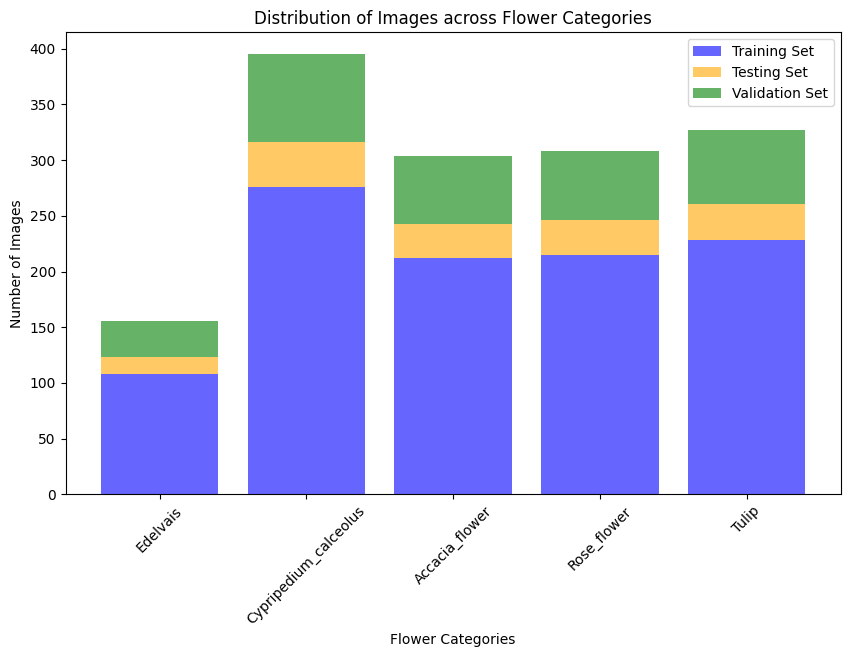

In [3]:

# Flower categories and corresponding counts
categories = ['Edelvais', 'Cypripedium_calceolus', 'Accacia_flower', 'Rose_flower', 'Tulip']
train_counts = [108, 276, 212, 215, 228]
test_counts = [15,40,31,31,33]
val_counts = [33,79,61,62,66]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, train_counts, color='blue', alpha=0.6, label='Training Set')
plt.bar(categories, test_counts, color='orange', alpha=0.6, label='Testing Set', bottom=train_counts)
plt.bar(categories, val_counts, color='green', alpha=0.6, label='Validation Set', bottom=[train + test for train, test in zip(train_counts, test_counts)])
plt.xlabel('Flower Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Flower Categories')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Proportion of Images

We calculate the proportion of images for each flower category in the training dataset. This allows us to identify if there are any imbalances in the distribution of images among different categories.


In [4]:
# Counts for each flower category in the training dataset
counts = {
    'Edelvais': 108,
    'Cypripedium_calceolus': 276,
    'Accacia_flower': 212,
    'Rose_flower': 215,
    'Tulip': 228
}

# Total number of images in the training dataset
total_images_train = sum(counts.values())

# Calculate the proportion of images for each category
proportions = {category: count / total_images_train for category, count in counts.items()}

# Print the proportion of images for each category
for category, proportion in proportions.items():
    print(f"Proportion of images for {category}: {proportion:.2%}")

# Calculate the number of images for each category based on the total number of images in the training dataset
num_images_train = {category: int(total_images_train * proportion) for category, proportion in proportions.items()}

# Print the number of images for each category
for category, num_images in num_images_train.items():
    print(f"Number of images for {category} in the training dataset: {num_images}")


Proportion of images for Edelvais: 10.39%
Proportion of images for Cypripedium_calceolus: 26.56%
Proportion of images for Accacia_flower: 20.40%
Proportion of images for Rose_flower: 20.69%
Proportion of images for Tulip: 21.94%
Number of images for Edelvais in the training dataset: 108
Number of images for Cypripedium_calceolus in the training dataset: 276
Number of images for Accacia_flower in the training dataset: 212
Number of images for Rose_flower in the training dataset: 215
Number of images for Tulip in the training dataset: 228


## Bias Analysis of Flower Image Dataset

### Identified Biases:

1. **Imbalance in Proportions**

2. **Underrepresentation of Edelvais**

3. **Overrepresentation of Cypripedium_calceolus**

### Potential Impact:
   - These biases could lead to unfair outcomes, such as misclassification or underestimation of underrepresented categories like Edelvais and overemphasis on overrepresented categories like Cypripedium_calceolus.

### Mitigation Strategies:
   - Addressing these biases may involve strategies such as collecting more data for underrepresented categories, augmenting images to increase the diversity within each category, or applying techniques to balance the dataset's representation across all categories.


## Proportion of the images in the dataset represented with a Pie Chart

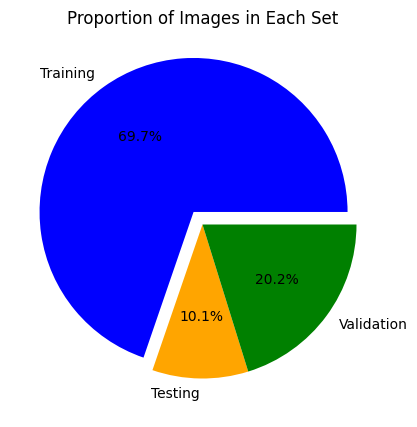

In [5]:
# Proportion of images in each set
total_train = sum(train_counts)
total_test = sum(test_counts)
total_val = sum(val_counts)
total_images = total_train + total_test + total_val

train_proportion = total_train / total_images
test_proportion = total_test / total_images
val_proportion = total_val / total_images

# Plotting
plt.figure(figsize=(8, 5))
plt.pie([train_proportion, test_proportion, val_proportion], labels=['Training', 'Testing', 'Validation'], autopct='%1.1f%%', colors=['blue', 'orange', 'green'], explode=(0.1, 0, 0))
plt.title('Proportion of Images in Each Set')
plt.show()


## Visualization of Sample Images

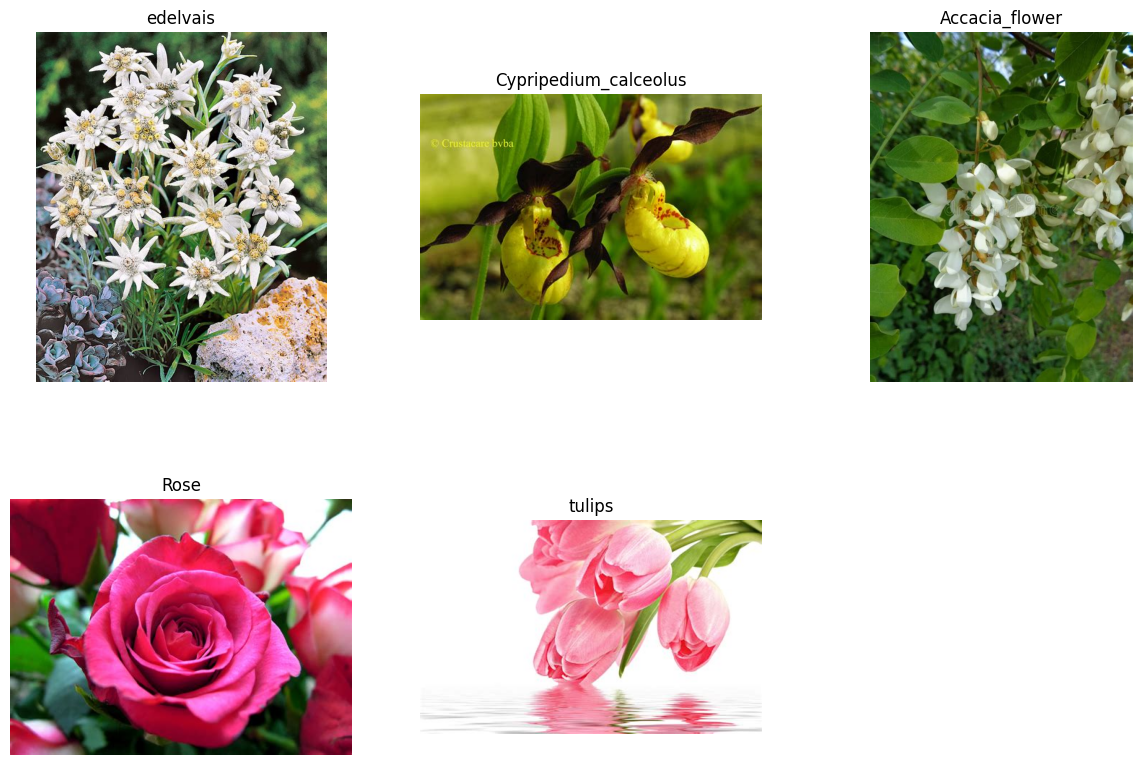

In [6]:

# Define the directory containing the dataset
dataset_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Train"

# Define flower categories
flower_categories = ['edelvais', 'Cypripedium_calceolus', 'Accacia_flower', 'Rose', 'tulips']

# Plotting
plt.figure(figsize=(15, 10))

# Loop through each category
for i, category in enumerate(flower_categories):
    # Get the directory for the current category
    category_dir = os.path.join(dataset_dir, category)
    
    # Check if the directory exists
    if os.path.exists(category_dir):
        # Get a list of all image files in the directory
        image_files = [file for file in os.listdir(category_dir) if file.endswith(('.jpg', '.png'))]
        
        # Check if there are any valid image files
        if image_files:
            # Select a random image from the list
            random_image = random.choice(image_files)
            image_path = os.path.join(category_dir, random_image)

            # Read and plot the image
            image = imread(image_path)

            plt.subplot(2, 3, i+1)
            plt.imshow(image)
            plt.title(category)
            plt.axis('off')
        else:
            print(f"No valid image files found in '{category}' directory.")
    else:
        print(f"Directory '{category}' not found.")

plt.show()


## Propose Individual Fairness Method

Introduction:
We propose employing Fairness Through Awareness to address bias in the distribution of flower types. This method involves augmenting images of underrepresented flower types, such as Edelvais, Rose_flower, and Tulip.

Elaboration:
By augmenting images of underrepresented flower types, we aim to achieve a more balanced distribution in the dataset. This approach directly mitigates bias related to unequal proportions of images for each flower type.

Effectiveness:
Fairness Through Awareness promotes fairness by ensuring equal representation of all flower types. This method actively addresses bias, leading to more equitable machine learning models without removing sensitive attributes.

In summary, Fairness Through Awareness via data augmentation is an effective approach to promote individual fairness and reduce the risk of biased predictions.



# Neural Networks

## Baselines

### Random Guess Accuracy

This code provides a simple and efficient method to compute the random guess accuracy for a classification task based on the distribution of images across different classes in the dataset.

In [7]:
# Proportion of images for each class
class_proportions = {
    'Edelvais': 0.104,
    'Cypripedium_calceolus': 0.2609,
    'Accacia_flower': 0.2155,
    'Rose_flower': 0.2032,
    'Tulip': 0.2164
}

# Find the most occurring class
most_occurring_class = max(class_proportions, key=class_proportions.get)

# Calculate random guess accuracy
random_guess_accuracy = class_proportions[most_occurring_class]

print("Random Guess Accuracy:", random_guess_accuracy)


Random Guess Accuracy: 0.2609


### Class Proportions

- Edelvais: 10.40%
- Cypripedium_calceolus: 26.09%
- Accacia_flower: 21.55%
- Rose_flower: 20.32%
- Tulip: 21.64%

The random guess accuracy is equal to the proportion of the most occurring class: 26.09%.

### Human-Level Performance Accuracy

Human-level performance in flower recognition typically ranges between 60% and 70% accuracy, as indicated by research studies:

[MDPI Research Article](https://www.mdpi.com/2311-7524/10/5/517)

[Oxford VGG Research](https://www.robots.ox.ac.uk/~vgg/research/flowers_demo/docs/Chai11.pdf)

## Our aim is to approach this level of accuracy with our machine learning models.

### Basic Multilayer Perceptron Accuracy

In [86]:
#This code snippet defines directory paths for the train, test, and validation subsets of the dataset.
train_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Train"
test_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Test"
val_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Validation"

In [87]:

def dataset_basic_multilayer(folder_path, height, width, channels):
    folder_paths = [
        os.path.join(folder_path, "Accacia_flower"),
        os.path.join(folder_path, "Cypripedium_calceolus"),
        os.path.join(folder_path, "edelvais"),
        os.path.join(folder_path, "Rose"),
        os.path.join(folder_path, "tulips"),
    ]

    class_names = [
        "Accacia_flower",
        "Cypripedium_calceolus",
        "edelvais",
        "Rose",
        "tulips",
    ]
    X = []
    y = []

    for i in range(len(folder_paths)):
        for filename in os.listdir(folder_paths[i]):
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                image_filename = os.path.join(folder_paths[i], filename)
                image = ski.io.imread(image_filename)
                image_resized = ski.transform.resize(image, (height, width, channels))
                X.append(image_resized)
                y.append(class_names[i])

    X = np.array(X)
    y = np.array(y)
    
    # One-hot encode the labels
    label_binarizer = LabelBinarizer()
    y = label_binarizer.fit_transform(y)

    return X, y, label_binarizer.classes_


The function loads images from specified folders, resizes them to a common size, and performs basic preprocessing.
It returns preprocessed image data (`X`), encoded labels (`y`), and class names (`class_names`).

In [89]:
folder_path = train_dir
height = 64
width = 64
channels = 3

X_train, y_train, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_train.shape)
print("Shape of y_one_hot:", y_train)
print("Class names:", class_names)

Shape of X: (1039, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


Here we use y to indicate which flower type each picture is

In [90]:
folder_path = test_dir
height = 64
width = 64
channels = 3

X_test, y_test, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_test.shape)
print("Shape of y_one_hot:", y_test.shape)
print("Class names:", class_names)

Shape of X: (150, 64, 64, 3)
Shape of y_one_hot: (150, 5)
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


This code snippet loads and preprocesses the test dataset using the `dataset_basic_multilayer` function.

In [91]:
folder_path = val_dir
height = 64
width = 64
channels = 3

X_val, y_val, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_val.shape)
print("Shape of y_one_hot:", y_val)
print("Class names:", class_names)

Shape of X: (300, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


This code snippet loads and preprocesses the validation dataset using the `dataset_basic_multilayer` function.

In [92]:
X_train = X_train.reshape(-1, 12288)
X_test = X_test.reshape(-1, 12288)
print(X_train)

[[0.34579128 0.39730761 0.15454647 ... 0.47052393 0.40131971 0.34622669]
 [0.38151058 0.37047074 0.23035957 ... 0.76658669 0.72467902 0.58943227]
 [0.34363741 0.4234793  0.22005441 ... 0.15875458 0.16625418 0.14002142]
 ...
 [0.79695612 0.35405081 0.50159144 ... 0.10493474 0.27572802 0.03787533]
 [0.03175993 0.02783795 0.0121499  ... 0.23610738 0.21696484 0.12377791]
 [0.00784314 0.00784314 0.00784314 ... 0.01228356 0.03120873 0.01981453]]


This code snippet reshapes the training and test data arrays to flatten them into a 1-dimensional format.

In [94]:


def build_model(print_summary=False):
    model = Sequential()
    # Add the input layer and the first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(12288,)))
    # Add the second hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the output layer
    model.add(Dense(5, activation='softmax'))
    # Display summary is optional
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,741 (3.01 MB)

 Trainable params: 788,741 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

This function builds a neural network model using the Keras Sequential API. It consists of an input layer, two hidden layers with ReLU activation, and an output layer with softmax activation for multi-class classification.


In [95]:
# compiling the model  

def compile_model(model, lr):
    # Instantiate Adam optimizer with the provided learning rate
    opt = Adam(learning_rate=lr)
    
    # Compile the model with categorical crossentropy loss and the Adam optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Compile the model with learning rate lr=0.001
model = compile_model(model, lr=0.001)

In [96]:
# training the model 
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2192 - loss: 2.5703 - val_accuracy: 0.4467 - val_loss: 1.4805
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4637 - loss: 1.3438 - val_accuracy: 0.5933 - val_loss: 1.0505
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5759 - loss: 1.0789 - val_accuracy: 0.5133 - val_loss: 1.0657
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 1.0163 - val_accuracy: 0.6333 - val_loss: 0.9442
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6719 - loss: 0.8680 - val_accuracy: 0.5933 - val_loss: 0.9738
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6329 - loss: 0.9041 - val_accuracy: 0.6467 - val_loss: 0.8596
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.7391 - val_accuracy: 0.6733 - val_loss: 0.8241
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7273 - loss: 0.7126 - val_accuracy: 0.6333 - v

## Data Augmentation

In [18]:
train_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Train"
test_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Test"
val_dir = "/home/ri9/Documents/FMI/Tensor/NewData/Validation"

Augmented images 

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def dataset_augmentation(folder_path, height, width, channels, augmentation=False, target_samples=300):
    folder_paths = [
        os.path.join(folder_path, "Accacia_flower"),
        os.path.join(folder_path, "Cypripedium_calceolus"),
        os.path.join(folder_path, "edelvais"),
        os.path.join(folder_path, "Rose"),
        os.path.join(folder_path, "tulips"),
    ]

    class_names = [
        "Accacia_flower",
        "Cypripedium_calceolus",
        "edelvais",
        "Rose",
        "tulips",
    ]
    X = []
    y = []

    for i in range(len(folder_paths)):
        class_count = 0
        while class_count < target_samples:
            for filename in os.listdir(folder_paths[i]):
                file_extension = os.path.splitext(filename)[1]
                if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                    image_filename = os.path.join(folder_paths[i], filename)
                    image = ski.io.imread(image_filename)
                    
                    # Resize image to desired dimensions (128x128)
                    image_resized = ski.transform.resize(image, (height, width, channels))
                    X.append(image_resized)
                    y.append(class_names[i])
                    class_count += 1

                    if augmentation and class_count < target_samples:
                        # Create an ImageDataGenerator instance with saturation adjustment and horizontal flip
                        datagen = ImageDataGenerator(
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                        )

                        # Reshape image for augmentation
                        image_aug = image_resized.reshape((1,) + image_resized.shape)

                        # Generate augmented images
                        augmented_images = datagen.flow(image_aug, batch_size=1)

                        # Append augmented images and their labels
                        for aug_img in augmented_images:
                            X.append(aug_img[0])
                            y.append(class_names[i])
                            class_count += 1
                            if class_count >= target_samples:
                                break

    X = np.array(X)
    y = np.array(y)
    
    # One-hot encode the labels
    label_binarizer = LabelBinarizer()
    y = label_binarizer.fit_transform(y)
    return X, y, label_binarizer.classes_


In [12]:
# Define the new dimensions for preprocessing
height = 128
width = 128
channels = 3

# Augment the dataset to ensure each class has at least 300 images
augmented_X_train, augmented_y_train, class_names = dataset_augmentation(train_dir, height, width, channels, augmentation=True, target_samples=300)


Printing some of the images to see if the code actually augmented any of them 

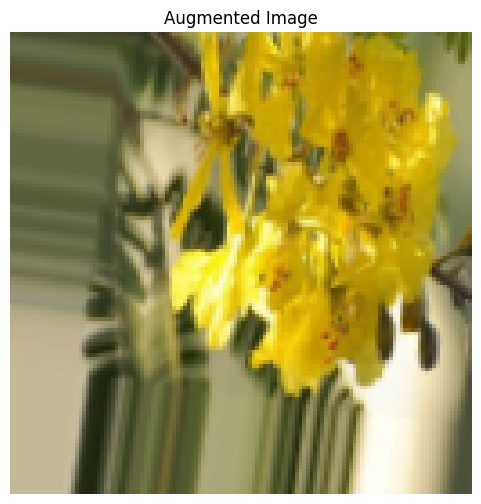

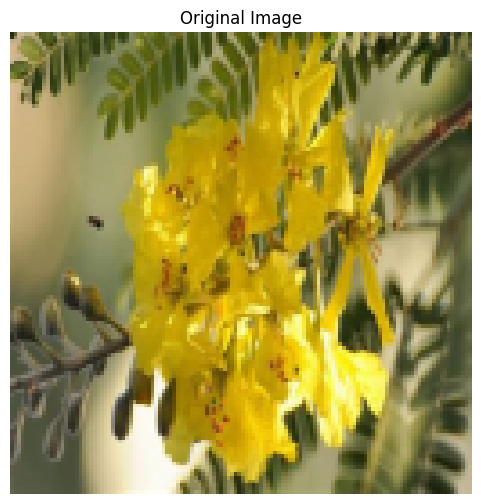

In [13]:
# Print one augmented image
plt.figure(figsize=(6, 6))
plt.imshow(augmented_X_train[1])
plt.title("Augmented Image")
plt.axis('off')
plt.show()

# Print one original image
plt.figure(figsize=(6, 6))
plt.imshow(augmented_X_train[0])
plt.title("Original Image")
plt.axis('off')
plt.show()


# Augmeting the original data increasing the size of it 10 times 

In [23]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

def augment_images_in_subfolders(source_folder, target_folder, height, width, channels, augmentations_per_image=10):
    # Create an ImageDataGenerator instance with desired augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Get all subfolders in the source folder
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]
    
    for subfolder in subfolders:
        class_name = os.path.basename(subfolder)
        target_subfolder = os.path.join(target_folder, class_name)
        
        if not os.path.exists(target_subfolder):
            os.makedirs(target_subfolder)

        for filename in os.listdir(subfolder):
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                image_path = os.path.join(subfolder, filename)
                image = load_img(image_path, target_size=(height, width))
                image_array = img_to_array(image)
                image_array = image_array.reshape((1,) + image_array.shape)

                # Generate augmented images
                save_prefix = os.path.splitext(filename)[0]
                counter = 0
                for batch in datagen.flow(image_array, batch_size=1, save_to_dir=target_subfolder, save_prefix=save_prefix, save_format='jpeg'):
                    counter += 1
                    if counter >= augmentations_per_image:
                        break

# Example usage
source_folder = '/home/ri9/Documents/FMI/Tensor/RawData'
target_folder = '/home/ri9/Documents/FMI/Tensor/AugmentedDataA'
height = 128
width = 128
channels = 3

augment_images_in_subfolders(source_folder, target_folder, height, width, channels)


# Augmeting the original data increasing the size of it 10 times and fixing the proportions

In this version of the code we also aim to fix the bias. In this case there is smaller count of edelvais images. 

In [21]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

def augment_images_to_equalize(source_folder, target_folder, height, width, channels, augmentations_per_image=10):
    # Create an ImageDataGenerator instance with desired augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Get all subfolders in the source folder
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]
    
    # Count the number of images in each subfolder
    image_counts = {}
    for subfolder in subfolders:
        count = len([f for f in os.listdir(subfolder) if os.path.splitext(f)[1].lower() in [".jpg", ".jpeg", ".png"]])
        image_counts[subfolder] = count
    
    # Determine the maximum number of images in any folder after augmentation
    max_images = max(image_counts.values()) * augmentations_per_image
    
    for subfolder in subfolders:
        class_name = os.path.basename(subfolder)
        target_subfolder = os.path.join(target_folder, class_name)
        
        if not os.path.exists(target_subfolder):
            os.makedirs(target_subfolder)
        
        current_image_count = image_counts[subfolder] * augmentations_per_image
        images_needed = max_images - current_image_count
        
        for filename in os.listdir(subfolder):
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                image_path = os.path.join(subfolder, filename)
                image = load_img(image_path, target_size=(height, width))
                image_array = img_to_array(image)
                image_array = image_array.reshape((1,) + image_array.shape)
                
                # Save the original image to the target folder
                original_save_path = os.path.join(target_subfolder, filename)
                save_img(original_save_path, image_array[0])
                
                # Generate augmented images
                save_prefix = os.path.splitext(filename)[0]
                counter = 0
                for batch in datagen.flow(image_array, batch_size=1, save_to_dir=target_subfolder, save_prefix=save_prefix, save_format='jpeg'):
                    counter += 1
                    images_needed -= 1
                    if counter >= augmentations_per_image:
                        break
                
                # Generate additional augmented images to meet the requirement
                while images_needed > 0:
                    for batch in datagen.flow(image_array, batch_size=1, save_to_dir=target_subfolder, save_prefix=save_prefix, save_format='jpeg'):
                        images_needed -= 1
                        if images_needed <= 0:
                            break

# Example usage
source_folder = '/home/ri9/Documents/FMI/Tensor/RawData'
target_folder = '/home/ri9/Documents/FMI/Tensor/AugmentedDataB'
height = 128
width = 128
channels = 3

augment_images_to_equalize(source_folder, target_folder, height, width, channels)



# Created the new Dataset A ( x10 img)

In [24]:


# Define the source and destination directories
source_dir = {
    'Accacia_flower': "/home/ri9/Documents/FMI/Tensor/AugmentedDataA/Accacia_flower",
    'Cypripedium_calceolus': "/home/ri9/Documents/FMI/Tensor/AugmentedDataA/Cypripedium_calceolus",
    'edelvais': "/home/ri9/Documents/FMI/Tensor/AugmentedDataA/edelvais",
    'Rose': "/home/ri9/Documents/FMI/Tensor/AugmentedDataA/Rose",
    'tulips': "/home/ri9/Documents/FMI/Tensor/AugmentedDataA/tulips"
}

train_dir_augmentedA = "/home/ri9/Documents/FMI/Tensor/augmentedA/Train"
test_dir_augmentedA = "/home/ri9/Documents/FMI/Tensor/augmentedA/Test"
val_dir_augmentedA = "/home/ri9/Documents/FMI/Tensor/augmentedA/Validation"

# Create destination directories if they don't exist
for directory in [train_dir_augmentedA, test_dir_augmentedA, val_dir_augmentedA]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the percentage split
train_split = 0.7
test_split = 0.1
val_split = 0.2

# Iterate over each flower category
for category in source_dir.keys():
    # Get list of files in the category directory
    category_dir = source_dir[category]
    files = os.listdir(category_dir)
    num_files = len(files)
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate split indices
    train_end = int(num_files * train_split)
    test_end = int(num_files * (train_split + test_split))
    
    # Assign files to train, test, and validation sets
    train_files = files[:train_end]
    test_files = files[train_end:test_end]
    val_files = files[test_end:]
    
    # Move files to respective directories
    for file in train_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(train_dir_augmentedA, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in test_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(test_dir_augmentedA, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in val_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(val_dir_augmentedA, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)

# Created the new Dataset B (Bias fixed and x10)

In [25]:


# Define the source and destination directories
source_dir = {
    'Accacia_flower': "/home/ri9/Documents/FMI/Tensor/AugmentedDataB/Accacia_flower",
    'Cypripedium_calceolus': "/home/ri9/Documents/FMI/Tensor/AugmentedDataB/Cypripedium_calceolus",
    'edelvais': "/home/ri9/Documents/FMI/Tensor/AugmentedDataB/edelvais",
    'Rose': "/home/ri9/Documents/FMI/Tensor/AugmentedDataB/Rose",
    'tulips': "/home/ri9/Documents/FMI/Tensor/AugmentedDataB/tulips"
}

train_dir_augmentedB = "/home/ri9/Documents/FMI/Tensor/augmentedB/Train"
test_dir_augmentedB = "/home/ri9/Documents/FMI/Tensor/augmentedB/Test"
val_dir_augmentedB = "/home/ri9/Documents/FMI/Tensor/augmentedB/Validation"

# Create destination directories if they don't exist
for directory in [train_dir_augmentedB, test_dir_augmentedB, val_dir_augmentedB]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the percentage split
train_split = 0.7
test_split = 0.1
val_split = 0.2

# Iterate over each flower category
for category in source_dir.keys():
    # Get list of files in the category directory
    category_dir = source_dir[category]
    files = os.listdir(category_dir)
    num_files = len(files)
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate split indices
    train_end = int(num_files * train_split)
    test_end = int(num_files * (train_split + test_split))
    
    # Assign files to train, test, and validation sets
    train_files = files[:train_end]
    test_files = files[train_end:test_end]
    val_files = files[test_end:]
    
    # Move files to respective directories
    for file in train_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(train_dir_augmentedB, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in test_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(test_dir_augmentedB, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)
        
    for file in val_files:
        src = os.path.join(category_dir, file)
        dest = os.path.join(val_dir_augmentedB, category)
        if not os.path.exists(dest):
            os.makedirs(dest)
        shutil.move(src, dest)

## Identify, and Describe Bias

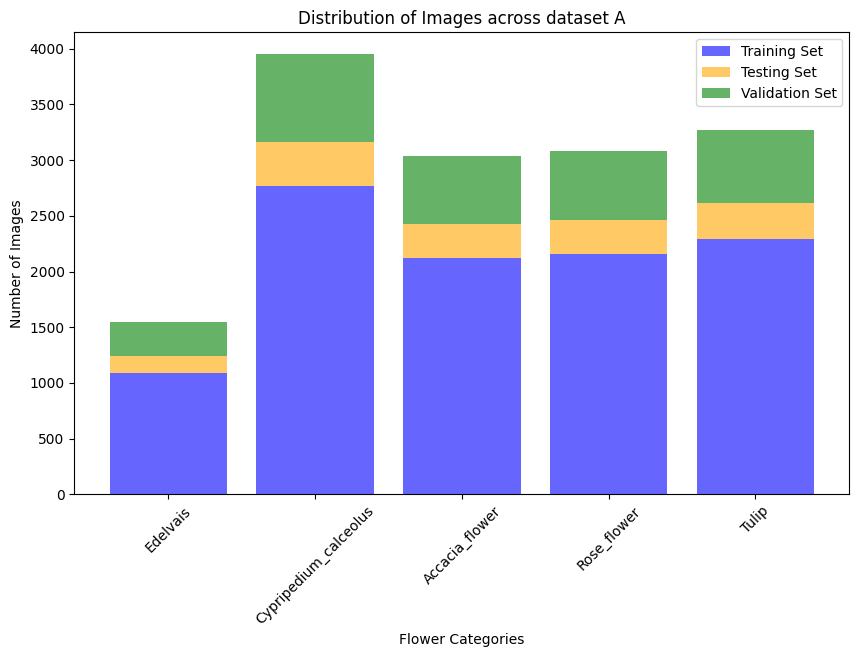

In [53]:

# Flower categories and corresponding counts
categories = ['Edelvais', 'Cypripedium_calceolus', 'Accacia_flower', 'Rose_flower', 'Tulip']
train_counts = [1085, 2765, 2126, 2155, 2288]
test_counts = [155,394,304,308,327]
val_counts = [310,791,608,616,654]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, train_counts, color='blue', alpha=0.6, label='Training Set')
plt.bar(categories, test_counts, color='orange', alpha=0.6, label='Testing Set', bottom=train_counts)
plt.bar(categories, val_counts, color='green', alpha=0.6, label='Validation Set', bottom=[train + test for train, test in zip(train_counts, test_counts)])
plt.xlabel('Flower Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across dataset A')
plt.legend()
plt.xticks(rotation=45)
plt.show()


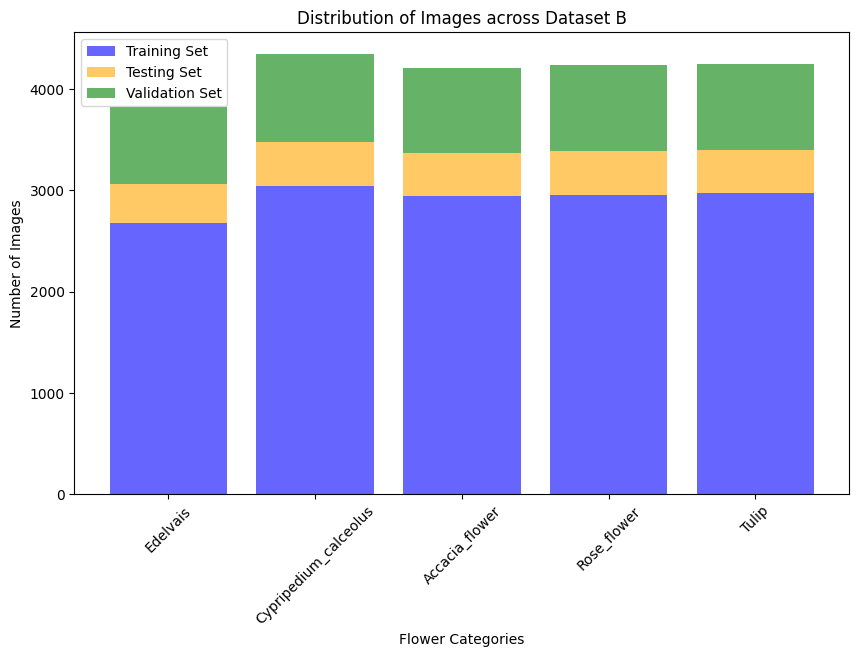

In [31]:
# Flower categories and corresponding counts
categories = ['Edelvais', 'Cypripedium_calceolus', 'Accacia_flower', 'Rose_flower', 'Tulip']
train_counts = [2676, 3040, 2945, 2958, 2976]
test_counts = [383,435,421,432,425]
val_counts = [765,869,842,846,851]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories, train_counts, color='blue', alpha=0.6, label='Training Set')
plt.bar(categories, test_counts, color='orange', alpha=0.6, label='Testing Set', bottom=train_counts)
plt.bar(categories, val_counts, color='green', alpha=0.6, label='Validation Set', bottom=[train + test for train, test in zip(train_counts, test_counts)])
plt.xlabel('Flower Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Dataset B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Dataset A 

Loading all images preparing for the model

In [73]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedA/Train"
height = 64
width = 64
channels = 3

X_train, y_train, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_train.shape)
print("Shape of y_one_hot:", y_train)
print("Class names:", class_names)

Shape of X: (10419, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [75]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedA/Test"
height = 64
width = 64
channels = 3

X_test, y_test, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_test.shape)
print("Shape of y_one_hot:", y_test.shape)
print("Class names:", class_names)

Shape of X: (1488, 64, 64, 3)
Shape of y_one_hot: (1488, 5)
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [76]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedA/Validation"
height = 64
width = 64
channels = 3

X_val, y_val, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_val.shape)
print("Shape of y_one_hot:", y_val)
print("Class names:", class_names)

Shape of X: (2979, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [77]:
X_train = X_train.reshape(-1, 12288)
X_test = X_test.reshape(-1, 12288)
print(X_train)

[[0.68176015 0.52447685 0.38287879 ... 0.59838252 0.56740744 0.51665021]
 [0.34372416 0.41227991 0.13308861 ... 0.57224408 0.54563422 0.47112545]
 [0.99607843 0.99607843 0.99607843 ... 0.04705882 0.45882353 0.68235294]
 ...
 [0.95511224 0.9472691  0.99040636 ... 0.17321676 0.21873588 0.04326286]
 [0.51435633 0.39196836 0.56450636 ... 0.03333486 0.10643152 0.09900894]
 [0.16279361 0.21452163 0.25564072 ... 0.28552826 0.10143138 0.16890413]]


Using the same model as the first model

In [79]:
def build_model(print_summary=False):
    model = Sequential()
    # Add the input layer and the first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(12288,)))
    # Add the second hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the output layer
    model.add(Dense(5, activation='softmax'))
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,741 (3.01 MB)

 Trainable params: 788,741 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
def compile_model(model, lr):
    # Instantiate Adam optimizer with the provided learning rate
    opt = Adam(learning_rate=lr)
    
    # Compile the model with categorical crossentropy loss and the Adam optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Compile the model with learning rate lr=0.001
model = compile_model(model, lr=0.001)

In [82]:

H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9409 - loss: 0.1739 - val_accuracy: 0.6949 - val_loss: 1.6156
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9457 - loss: 0.1589 - val_accuracy: 0.6707 - val_loss: 1.7526
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9357 - loss: 0.1765 - val_accuracy: 0.6687 - val_loss: 1.7730
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9606 - loss: 0.1169 - val_accuracy: 0.6801 - val_loss: 1.6429
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9511 - loss: 0.1437 - val_accuracy: 0.6754 - val_loss: 1.7201
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9473 - loss: 0.1482 - val_accuracy: 0.6808 - val_loss: 1.7709
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9288 - loss: 0.2242 - val_accuracy: 0.6794 - val_loss: 1.6048
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9374 - loss: 0.1889 - val_accu

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9649 - loss: 0.1026 - val_accuracy: 0.7056 - val_loss: 2.0192
Epoch 52/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9720 - loss: 0.0780 - val_accuracy: 0.6855 - val_loss: 2.0336
Epoch 53/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9802 - loss: 0.0624 - val_accuracy: 0.6841 - val_loss: 2.2908
Epoch 54/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9620 - loss: 0.1089 - val_accuracy: 0.6720 - val_loss: 2.0894
Epoch 55/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.0845 - val_accuracy: 0.6882 - val_loss: 2.1853
Epoch 56/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9717 - loss: 0.0892 - val_accuracy: 0.6714 - val_loss: 2.1348
Epoch 57/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.0912 - val_accuracy: 0.6734 - val_loss: 2.1609
Epoch 58/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9658 - loss: 0.1102 - val_accuracy:

# Dataset B

Loading all images preparing for the model

In [117]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedB/Train"
height = 64
width = 64
channels = 3

X_train, y_train, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_train.shape)
print("Shape of y_one_hot:", y_train)
print("Class names:", class_names)

Shape of X: (14595, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [118]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedB/Test"
height = 64
width = 64
channels = 3

X_test, y_test, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_test.shape)
print("Shape of y_one_hot:", y_test.shape)
print("Class names:", class_names)

Shape of X: (2087, 64, 64, 3)
Shape of y_one_hot: (2087, 5)
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [119]:
folder_path = "/home/ri9/Documents/FMI/Tensor/augmentedB/Validation"
height = 64
width = 64
channels = 3

X_val, y_val, class_names = dataset_basic_multilayer(folder_path, height, width, channels)

print("Shape of X:", X_val.shape)
print("Shape of y_one_hot:", y_val)
print("Class names:", class_names)

Shape of X: (4173, 64, 64, 3)
Shape of y_one_hot: [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
Class names: ['Accacia_flower' 'Cypripedium_calceolus' 'Rose' 'edelvais' 'tulips']


In [120]:
X_train = X_train.reshape(-1, 12288)
X_test = X_test.reshape(-1, 12288)
print(X_train)

[[0.54509856 0.64313777 0.95686326 ... 0.45857828 0.53106872 0.40123216]
 [0.42463685 0.50343577 0.3579432  ... 0.14697295 0.209297   0.10383598]
 [0.43491632 0.46092226 0.40320633 ... 0.18750132 0.24342854 0.07212135]
 ...
 [0.80654097 0.00666731 0.01109363 ... 0.58431373 0.04313725 0.03137255]
 [0.00784314 0.00784314 0.00784314 ... 0.01798553 0.03360586 0.02213984]
 [0.90265992 0.68495429 0.33906957 ... 0.89537164 0.72016497 0.12715906]]


Using the same model as the first model

In [103]:
def build_model(print_summary=False):
    model = Sequential()
    # Add the input layer and the first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(12288,)))
    # Add the second hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the output layer
    model.add(Dense(5, activation='softmax'))
    if print_summary:
        model.summary()
    return model

model = build_model(print_summary=True)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 788,741 (3.01 MB)

 Trainable params: 788,741 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [104]:
def compile_model(model, lr):
    # Instantiate Adam optimizer with the provided learning rate
    opt = Adam(learning_rate=lr)
    
    # Compile the model with categorical crossentropy loss and the Adam optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Compile the model with learning rate lr=0.001
model = compile_model(model, lr=0.001)

In [106]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9110 - loss: 0.2674 - val_accuracy: 0.7465 - val_loss: 1.2384
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9518 - loss: 0.1347 - val_accuracy: 0.7480 - val_loss: 1.2937
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9226 - loss: 0.2165 - val_accuracy: 0.7484 - val_loss: 1.2971
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9489 - loss: 0.1426 - val_accuracy: 0.7398 - val_loss: 1.4488
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9461 - loss: 0.1479 - val_accuracy: 0.7413 - val_loss: 1.2696
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9360 - loss: 0.1759 - val_accuracy: 0.7240 - val_loss: 1.7039
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9242 - loss: 0.2200 - val_accuracy: 0.7269 - val_loss: 1.3764
Epoch 8/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9450 - loss: 0.1513 - val_accu

457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9596 - loss: 0.1106 - val_accuracy: 0.7221 - val_loss: 1.9725
Epoch 52/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9495 - loss: 0.1601 - val_accuracy: 0.7456 - val_loss: 1.8865
Epoch 53/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9714 - loss: 0.0859 - val_accuracy: 0.7441 - val_loss: 1.7935
Epoch 54/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9630 - loss: 0.1028 - val_accuracy: 0.7283 - val_loss: 1.7905
Epoch 55/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9548 - loss: 0.1335 - val_accuracy: 0.7408 - val_loss: 1.7778
Epoch 56/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9487 - loss: 0.1531 - val_accuracy: 0.7446 - val_loss: 1.6831
Epoch 57/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9585 - loss: 0.1340 - val_accuracy: 0.7504 - val_loss: 1.7005
Epoch 58/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9789 - loss: 0.0697 - val_accuracy:

# Update the model

Using Dataset B we achived ~74% acuracy. The model below adds one hidden layer for test.

In [110]:
from keras.models import Sequential
from keras.layers import Dense

def build_model2(print_summary=False):
    model = Sequential()
    # Add the input layer and the first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(12288,)))
    # Add the second hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the third hidden layer
    model.add(Dense(16, activation='relu'))
    # Add the fourth hidden layer (newly added)
    model.add(Dense(8, activation='relu'))
    # Add the output layer
    model.add(Dense(5, activation='softmax'))
    if print_summary:
        model.summary()
    return model

model = build_model2(print_summary=True)



Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 789,285 (3.01 MB)

 Trainable params: 789,285 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
def compile_model(model, lr):
    # Instantiate Adam optimizer with the provided learning rate
    opt = Adam(learning_rate=lr)
    
    # Compile the model with categorical crossentropy loss and the Adam optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Compile the model with learning rate lr=0.001
model = compile_model(model, lr=0.001)

In [112]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4992 - loss: 1.1845 - val_accuracy: 0.6497 - val_loss: 0.8660
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6704 - loss: 0.8296 - val_accuracy: 0.6354 - val_loss: 0.8650
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7006 - loss: 0.7626 - val_accuracy: 0.6761 - val_loss: 0.8756
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7255 - loss: 0.7064 - val_accuracy: 0.7417 - val_loss: 0.6804
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7446 - loss: 0.6592 - val_accuracy: 0.7504 - val_loss: 0.6640
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7450 - loss: 0.6605 - val_accuracy: 0.7508 - val_loss: 0.6819
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7541 - loss: 0.6481 - val_accuracy: 0.7159 - val_loss: 0.7964
Epoch 8/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7526 - loss: 0.6580 - val_accu

457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9089 - loss: 0.2345 - val_accuracy: 0.7585 - val_loss: 0.9121
Epoch 52/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9085 - loss: 0.2463 - val_accuracy: 0.7566 - val_loss: 0.8687
Epoch 53/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - loss: 0.2387 - val_accuracy: 0.7738 - val_loss: 0.9284
Epoch 54/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9115 - loss: 0.2433 - val_accuracy: 0.7695 - val_loss: 0.8571
Epoch 55/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9051 - loss: 0.2442 - val_accuracy: 0.7777 - val_loss: 0.8287
Epoch 56/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9220 - loss: 0.2164 - val_accuracy: 0.7729 - val_loss: 0.9058
Epoch 57/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9181 - loss: 0.2274 - val_accuracy: 0.7844 - val_loss: 0.8011
Epoch 58/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9239 - loss: 0.2030 - val_accuracy:

After testing different parameters and layer configurations, this model was found to be the most effective. It utilizes a deep neural network architecture with six hidden layers, employing Rectified Linear Unit (ReLU) activation functions throughout to enable nonlinear transformations. Dropout with a rate of 0.5 is included after the fifth hidden layer to mitigate overfitting by randomly dropping half of the neurons during training. The output layer consists of five neurons with a softmax activation function, suitable for multi-class classification tasks. This setup aims to maximize feature extraction and generalization capabilities, ensuring robust performance on diverse datasets.

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def build_model2(print_summary=False):
    model = Sequential()
    # Add the input layer and the first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(12288,)))
    # Add the second hidden layer
    model.add(Dense(64, activation='relu'))
    # Add the third hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the fourth hidden layer
    model.add(Dense(32, activation='relu'))
    # Add the fifth hidden layer
    model.add(Dense(16, activation='relu'))
    # Add the sixth hidden layer
    model.add(Dense(16, activation='relu'))
    # Add dropout layer to prevent overfitting
    model.add(Dropout(0.5))
    # Add the output layer
    model.add(Dense(5, activation='softmax'))
    # Display summary is optional
    if print_summary:
        model.summary()
    return model

model = build_model2(print_summary=True)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 794,677 (3.03 MB)

 Trainable params: 794,677 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
def compile_model(model, lr):
    # Instantiate Adam optimizer with the provided learning rate
    opt = Adam(learning_rate=lr)
    
    # Compile the model with categorical crossentropy loss and the Adam optimizer
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Compile the model with learning rate lr=0.001
model = compile_model(model, lr=0.001)

In [123]:
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3199 - loss: 1.4823 - val_accuracy: 0.6287 - val_loss: 1.0122
Epoch 2/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5792 - loss: 1.0741 - val_accuracy: 0.6172 - val_loss: 0.9790
Epoch 3/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5996 - loss: 1.0058 - val_accuracy: 0.6895 - val_loss: 0.8757
Epoch 4/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6295 - loss: 0.9519 - val_accuracy: 0.7125 - val_loss: 0.7859
Epoch 5/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6581 - loss: 0.8797 - val_accuracy: 0.6996 - val_loss: 0.7711
Epoch 6/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6262 - loss: 0.9328 - val_accuracy: 0.7029 - val_loss: 0.7743
Epoch 7/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6660 - loss: 0.8491 - val_accuracy: 0.7106 - val_loss: 0.8073
Epoch 8/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6608 - loss: 0.8564 - val_accu

457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7989 - loss: 0.5239 - val_accuracy: 0.7700 - val_loss: 0.7655
Epoch 52/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7967 - loss: 0.5415 - val_accuracy: 0.7532 - val_loss: 1.0924
Epoch 53/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8147 - loss: 0.5113 - val_accuracy: 0.7451 - val_loss: 0.8258
Epoch 54/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8014 - loss: 0.5376 - val_accuracy: 0.7580 - val_loss: 1.0946
Epoch 55/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8028 - loss: 0.5323 - val_accuracy: 0.7729 - val_loss: 0.7622
Epoch 56/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8083 - loss: 0.5056 - val_accuracy: 0.7561 - val_loss: 0.7731
Epoch 57/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7925 - loss: 0.5417 - val_accuracy: 0.7341 - val_loss: 0.8418
Epoch 58/100
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7933 - loss: 0.5345 - val_accuracy:

# CNN

A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing structured grid-like data, such as images. It consists of multiple layers of filters (convolutions) that automatically extract features from input data. These layers typically include convolutional, pooling, and fully connected layers, sequentially arranged to progressively learn hierarchical representations of the input. CNNs are widely used in computer vision tasks like image classification, object detection, and image segmentation due to their ability to efficiently capture spatial dependencies in data.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir= "/home/ri9/Documents/FMI/Tensor/augmentedB/Train"
test_dir = "/home/ri9/Documents/FMI/Tensor/augmentedB/Test"
validation_dir = "/home/ri9/Documents/FMI/Tensor/augmentedB/Validation"

height = 128
width = 128
batch_size = 32

# Initialize the ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators for train, validation, and test sets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),  # Replace with your target image size
    batch_size=batch_size,        # Replace with your desired batch size
    class_mode='categorical'      # Use 'categorical' for multi-class classification
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 14595 images belonging to 5 classes.
Found 4173 images belonging to 5 classes.
Found 2087 images belonging to 5 classes.


Class indices: {'Accacia_flower': 0, 'Cypripedium_calceolus': 1, 'Rose': 2, 'edelvais': 3, 'tulips': 4}
Shape of train_images: (32, 128, 128, 3)
Shape of train_labels: (32, 5)


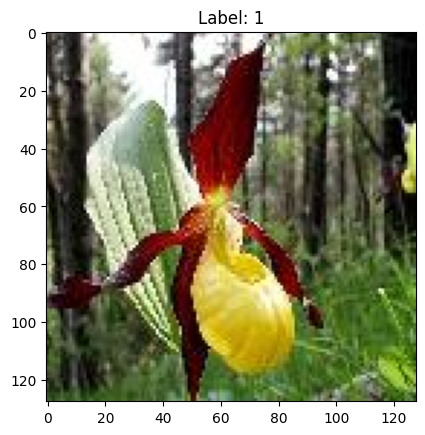

In [45]:
# Print the class indices to understand the mapping
print("Class indices:", train_generator.class_indices)

# Get a batch of images and labels from the train generator
train_images, train_labels = next(train_generator)

# Check the shapes of images and labels
print("Shape of train_images:", train_images.shape)  # Should be (batch_size, height, width, channels)
print("Shape of train_labels:", train_labels.shape)  # Should be (batch_size, num_classes)

# Display an example image and its label
index = 0  # Change the index to see different images
image = train_images[index]
label = train_labels[index]

plt.imshow(image)
plt.title(f'Label: {np.argmax(label)}')  # Assuming 'categorical' class_mode
plt.show()


In [52]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,941,381 (49.37 MB)

 Trainable params: 12,941,381 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

height = 128
width = 128
channels = 3
batch_size = 32

# Get the class names
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as necessary
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 159s 346ms/step - accuracy: 0.6395 - loss: 0.9003 - val_accuracy: 0.8236 - val_loss: 0.4708
Epoch 2/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 158s 346ms/step - accuracy: 0.8503 - loss: 0.3974 - val_accuracy: 0.8804 - val_loss: 0.3359
Epoch 3/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 158s 345ms/step - accuracy: 0.9021 - loss: 0.2627 - val_accuracy: 0.8991 - val_loss: 0.2797
Epoch 4/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 160s 351ms/step - accuracy: 0.9440 - loss: 0.1495 - val_accuracy: 0.9034 - val_loss: 0.2833
Epoch 5/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 158s 346ms/step - accuracy: 0.9686 - loss: 0.0862 - val_accuracy: 0.9001 - val_loss: 0.3372
Epoch 6/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 157s 343ms/step - accuracy: 0.9787 - loss: 0.0639 - val_accuracy: 0.9101 - val_loss: 0.3387
Epoch 7/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 159s 347ms/step - accuracy: 0.9845 - loss: 0.0464 - val_accuracy: 0.9286 - val_loss: 0.2864
Epoch 8/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 160s 349ms/step - accuracy: 0.9945 -

#### Plot learning curves

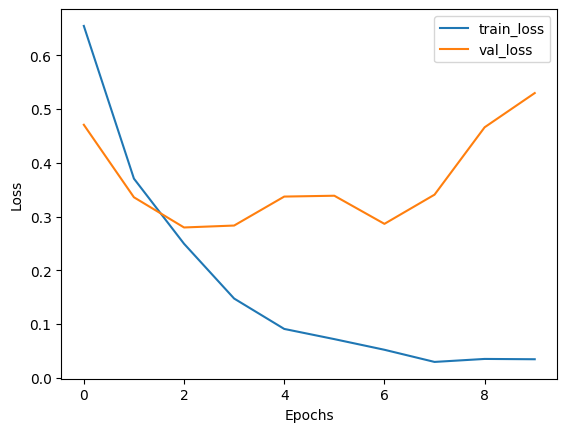

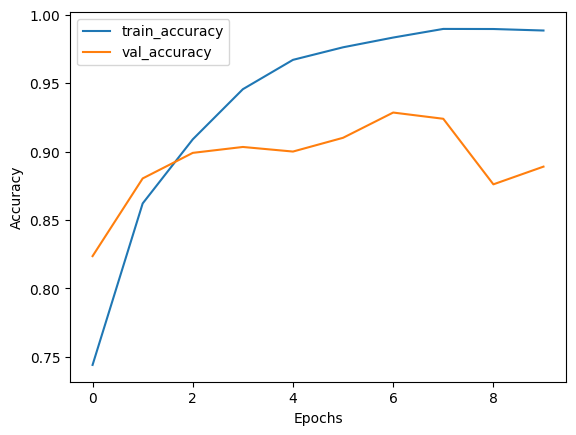

In [47]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Separation into test / validation / train before augmentation

Initially, the dataset was augmented by generating 10 additional images per original image. Subsequently, the dataset was divided into training, validation, and test sets with a split ratio of 70%, 20%, and 10% respectively. Recognizing the potential for data leakage due to the augmentation preceding the separation, steps were taken to rectify this issue. The dataset was first separated into distinct training, validation, and test sets prior to any augmentation or preprocessing steps. This approach ensures the integrity of the model evaluation by preventing augmented data from leaking across different subsets used for training, validation, and final testing.

In [35]:
import os
import shutil
from sklearn.model_selection import train_test_split

def divide_data_into_subfolders(source_folder, target_folder, train_ratio=0.7, validation_ratio=0.2, test_ratio=0.1):
    class_folders = [f.path for f in os.scandir(source_folder) if f.is_dir()]
    class_counts = {}
    
    # Count number of images in each class
    for class_folder in class_folders:
        class_name = os.path.basename(class_folder)
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        class_counts[class_name] = len(image_files)
    
    # Create target subfolders and copy images with fixed proportions
    for class_name, count in class_counts.items():
        train_count = int(count * train_ratio)
        val_count = int(count * validation_ratio)
        test_count = count - train_count - val_count
        
        # Get all image files in the class folder
        image_files = [os.path.join(source_folder, class_name, f) for f in os.listdir(os.path.join(source_folder, class_name)) 
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Split files into train, validation, and test sets
        train_files, temp_files = train_test_split(image_files, train_size=train_ratio, random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=test_ratio / (validation_ratio + test_ratio), random_state=42)
        
        # Copy files to target subfolders
        _copy_files_to_target(train_files, os.path.join(target_folder, 'train', class_name))
        _copy_files_to_target(val_files, os.path.join(target_folder, 'validation', class_name))
        _copy_files_to_target(test_files, os.path.join(target_folder, 'test', class_name))

def _copy_files_to_target(files, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    for file in files:
        shutil.copy(file, target_folder)

# Main script to execute the function
source_folder = '/home/ri9/Documents/FMI/Tensor/RawData'
target_folder = '/home/ri9/Documents/FMI/Tensor/augmentedCt'

# Divide data into train, validation, and test sets
divide_data_into_subfolders(source_folder, target_folder)

print("Data separation completed.")

Data separation completed.
Done


In [37]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

def augment_images_to_equalize(source_folder, target_folder, height, width, channels, augmentations_per_image=10):
    # Create an ImageDataGenerator instance with desired augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Get all subfolders in the source folder
    subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]
    
    # Count the number of images in each subfolder
    image_counts = {}
    for subfolder in subfolders:
        count = len([f for f in os.listdir(subfolder) if os.path.splitext(f)[1].lower() in [".jpg", ".jpeg", ".png"]])
        image_counts[subfolder] = count
    
    # Determine the maximum number of images in any folder after augmentation
    max_images = max(image_counts.values()) * augmentations_per_image
    
    for subfolder in subfolders:
        class_name = os.path.basename(subfolder)
        target_subfolder = os.path.join(target_folder, class_name)
        
        if not os.path.exists(target_subfolder):
            os.makedirs(target_subfolder)
        
        current_image_count = image_counts[subfolder] * augmentations_per_image
        images_needed = max_images - current_image_count
        
        for filename in os.listdir(subfolder):
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() in [".jpg", ".jpeg", ".png"]:
                image_path = os.path.join(subfolder, filename)
                image = load_img(image_path, target_size=(height, width))
                image_array = img_to_array(image)
                image_array = image_array.reshape((1,) + image_array.shape)
                
                # Save the original image to the target folder
                original_save_path = os.path.join(target_subfolder, filename)
                save_img(original_save_path, image_array[0])
                
                # Generate augmented images
                save_prefix = os.path.splitext(filename)[0]
                counter = 0
                for batch in datagen.flow(image_array, batch_size=1, save_to_dir=target_subfolder, save_prefix=save_prefix, save_format='jpeg'):
                    counter += 1
                    images_needed -= 1
                    if counter >= augmentations_per_image:
                        break
                
                # Generate additional augmented images to meet the requirement
                while images_needed > 0:
                    for batch in datagen.flow(image_array, batch_size=1, save_to_dir=target_subfolder, save_prefix=save_prefix, save_format='jpeg'):
                        images_needed -= 1
                        if images_needed <= 0:
                            break

# Example usage
source_folder = '/home/ri9/Documents/FMI/Tensor/augmentedCt/test'
target_folder = '/home/ri9/Documents/FMI/Tensor/augmentedC/test'
height = 128
width = 128
channels = 3
augment_images_to_equalize(source_folder, target_folder, height, width, channels)

source_folder = '/home/ri9/Documents/FMI/Tensor/augmentedCt/train'
target_folder = '/home/ri9/Documents/FMI/Tensor/augmentedC/train'
augment_images_to_equalize(source_folder, target_folder, height, width, channels)

source_folder = '/home/ri9/Documents/FMI/Tensor/augmentedCt/validation'
target_folder = '/home/ri9/Documents/FMI/Tensor/augmentedC/validation'
augment_images_to_equalize(source_folder, target_folder, height, width, channels)

print("Done")


Done


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir= "/home/ri9/Documents/FMI/Tensor/augmentedC/train"
test_dir = "/home/ri9/Documents/FMI/Tensor/augmentedC/test"
validation_dir = "/home/ri9/Documents/FMI/Tensor/augmentedC/validation"

height = 128
width = 128
batch_size = 32

# Initialize the ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators for train, validation, and test sets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),  # Replace with your target image size
    batch_size=batch_size,        # Replace with your desired batch size
    class_mode='categorical'      # Use 'categorical' for multi-class classification
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14610 images belonging to 5 classes.
Found 4186 images belonging to 5 classes.
Found 2104 images belonging to 5 classes.


Class indices: {'Accacia_flower': 0, 'Cypripedium_calceolus': 1, 'Rose': 2, 'edelvais': 3, 'tulips': 4}
Shape of train_images: (32, 128, 128, 3)
Shape of train_labels: (32, 5)


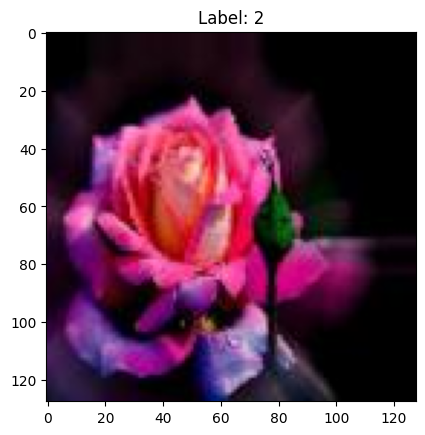

In [49]:
# Print the class indices to understand the mapping
print("Class indices:", train_generator.class_indices)

# Get a batch of images and labels from the train generator
train_images, train_labels = next(train_generator)

# Check the shapes of images and labels
print("Shape of train_images:", train_images.shape)  # Should be (batch_size, height, width, channels)
print("Shape of train_labels:", train_labels.shape)  # Should be (batch_size, num_classes)

# Display an example image and its label
index = 0  # Change the index to see different images
image = train_images[index]
label = train_labels[index]

plt.imshow(image)
plt.title(f'Label: {np.argmax(label)}')  # Assuming 'categorical' class_mode
plt.show()


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

height = 128
width = 128
channels = 3
batch_size = 32

# Get the class names
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as necessary
    validation_data=validation_generator
)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 158s 344ms/step - accuracy: 0.6850 - loss: 0.8196 - val_accuracy: 0.8430 - val_loss: 0.4617
Epoch 2/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 156s 341ms/step - accuracy: 0.8586 - loss: 0.3791 - val_accuracy: 0.8476 - val_loss: 0.4227
Epoch 3/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 158s 346ms/step - accuracy: 0.9193 - loss: 0.2208 - val_accuracy: 0.8638 - val_loss: 0.4575
Epoch 4/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 159s 347ms/step - accuracy: 0.9533 - loss: 0.1312 - val_accuracy: 0.8837 - val_loss: 0.4693
Epoch 5/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 157s 344ms/step - accuracy: 0.9777 - loss: 0.0662 - val_accuracy: 0.8827 - val_loss: 0.5726
Epoch 6/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 159s 347ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.8753 - val_loss: 0.6267
Epoch 7/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 155s 340ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.8868 - val_loss: 0.6634
Epoch 8/10
457/457 ━━━━━━━━━━━━━━━━━━━━ 157s 344ms/step - accuracy: 0.9925 -

#### Plot learning curves

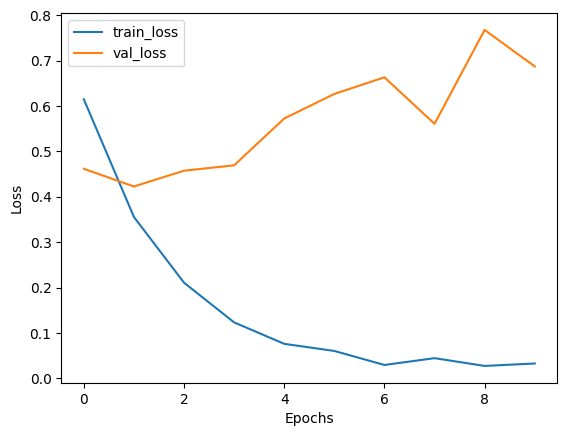

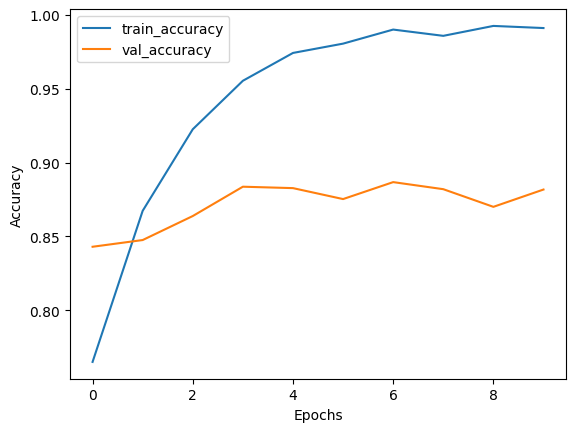

In [51]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()